# Pyplot Tutorial

matplotlib.pyplot est un ensemble de fonctions qui font que matplotlib fonctionne comme MATLAB.
Chaque fonction pyplot change une figure, par exemple : crée une figure, crée une zone de traçage sur une figure, trace quelques lignes dans une zone de traçage, décore le tracé avec des étiquettes, etc.

Dans matplotlib.pyplot, différents états sont préservés à travers les appels de fonction, de sorte qu'il conserve la trace d'objets comme la figure courante et la zone de traçage, et les fonctions de traçage sont dirigées vers les axes actuels (notez que "axes" ici se réfère à la partie des axes d'une figure et non pas au terme mathématique strict).

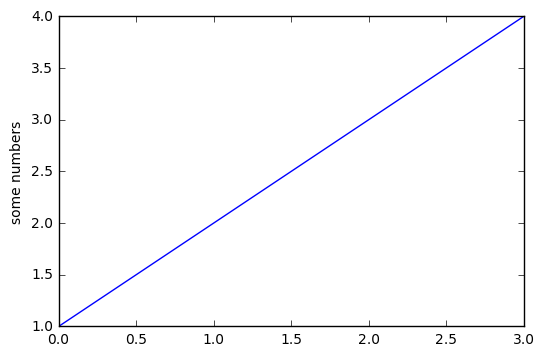

In [1]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Vous vous demandez peut-être pourquoi l'axe des x varie de 0 à 3 et l'axe des y de 1 à 4. Si vous fournissez une seule liste ou tableau à la commande plot (), matplotlib suppose que c'est une séquence de valeurs y, et génère automatiquement les valeurs x pour vous. Puisque les gammes python commencent par 0, le vecteur x par défaut a la même longueur que y mais commence par 0. Par conséquent, les données x sont [0,1,2,3].

Plot () est une commande polyvalente, et prendra un nombre arbitraire d'arguments. Par exemple, pour tracer x par rapport à y, vous pouvez exécuter la commande:

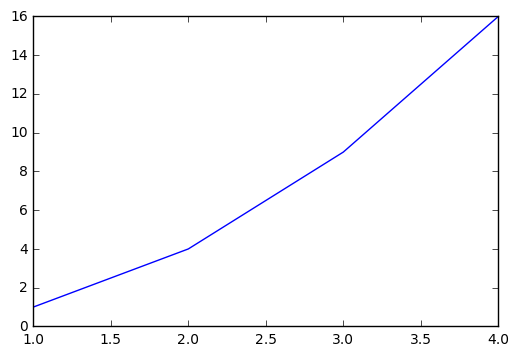

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Pour chaque x, y paire d'arguments, il y a un troisième argument facultatif qui est la chaîne de format pour indiquer la couleur et le type de ligne du tracé. Les lettres et les symboles de la chaîne de format sont les même que ceux de MATLAB, et vous concaténez une chaîne de couleur avec une chaîne de caractères. La chaîne de format par défaut est 'b-', qui est une ligne bleue pleine. Par exemple, pour tracer le dessus avec des cercles rouges, vous émettre:

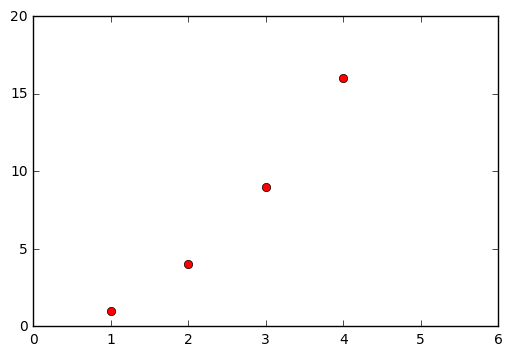

In [3]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Consultez la documentation plot () pour obtenir une liste complète des styles de ligne et des chaînes de format. La commande axis () dans l'exemple ci-dessus prend une liste de [xmin, xmax, ymin, ymax] et spécifie la fenêtre des axes.

Si matplotlib était limité au travail avec les listes, il serait assez inutile pour le traitement numérique. Généralement, vous utiliserez des tableaux numpy. En fait, toutes les séquences sont converties en matrices numpy en interne. L'exemple ci-dessous illustre un traçage de plusieurs lignes avec différents styles de format dans une commande à l'aide de tableaux.

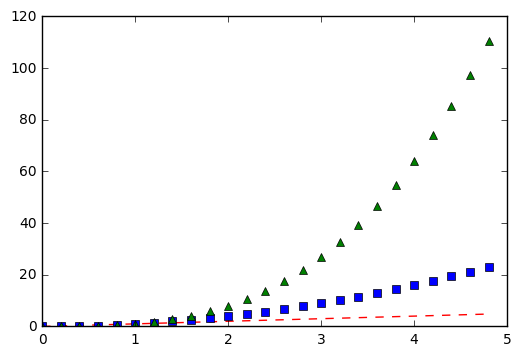

In [4]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Controler les propriétés des lignes

Les lignes ont de nombreux attributs que vous pouvez définir: la largeur de ligne, le style de tiret, l'antialiasing, etc.
Voir matplotlib.lines.Line2D. Il existe plusieurs façons de définir les propriétés de ligne

- Utiliser le mots-clé args :


 plt.plot(x, y, linewidth=2.0)

- Utiliser les méthodes setter d'une instance Line2D. Plot renvoie une liste d'objets Line2D. Par exemple, ligne1, ligne2 = plot(x1, y1, x2, y2). Dans le code ci-dessous nous supposerons que nous avons une seule ligne de sorte que la liste retournée est de longueur 1. On utilise l'unpacking de tuple avec line, pour obtenir le premier élément de cette liste :

line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising

- Utiliser la commande setp (). L'exemple ci-dessous utilise une commande similaire à MATLAB pour définir plusieurs propriétés sur une liste de lignes. Setp fonctionne de manière transparente avec une liste d'objets ou un seul objet. Vous pouvez soit utiliser des arguments de mots clés python, soit des paires string / value de MATLAB :

lines = plt.plot(x1, y1, x2, y2)
#use keyword args
plt.setp(lines, color='r', linewidth=2.0)
#or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

Pour obtenir une liste de propriétés de lignes réglables, appelez la fonction step() avec une ligne ou des lignes comme argument.

In [5]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

# Travailler avec plusieurs figures et axes

MATLAB, et pyplot, ont le concept de la figure actuelle et les axes actuels. Toutes les commandes de traçage s'appliquent aux axes actuels. La fonction gca() renvoie les axes actuels (une instance matplotlib.axes.Axes), et gcf() renvoie la figure courante (instance matplotlib.figure.Figure). Normalement, vous n'avez pas à vous inquiéter à ce sujet, car tout est pris en charge en arrière plan. Ci-dessous un script pour créer deux sous-tracés.

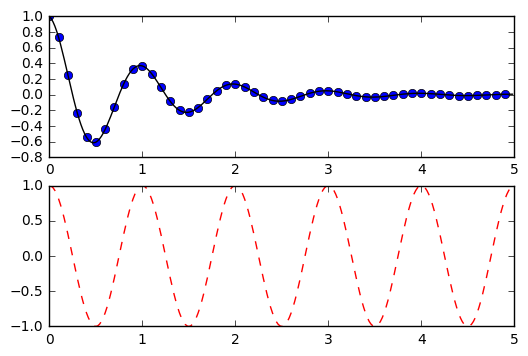

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

La commande figure() est facultative car la figure (1) sera créée par défaut, tout comme une subplot(111) sera créée par défaut si vous ne spécifiez pas manuellement d'axes. La commande subplot() spécifie numrows, numcols, fignum où fignum varie de 1 à numrows * numcols. Les virgules dans la subplot sont facultatives si numbres * numcols < 10. Ainsi, subplot(211) est identique à subplot(2, 1, 1). Vous pouvez créer un nombre arbitraire de sous-tracés et d'axes. Si vous voulez placer un axe manuellement, c'est-à-dire pas sur une grille rectangulaire, utilisez la commande axes(), qui vous permet de spécifier l'emplacement avec axes([left, bottom, width, height]) où toutes les valeurs sont des fractions (0 à 1).

Vous pouvez créer plusieurs figures en utilisant plusieurs figure() avec un numéro de chiffre croissant. Bien sûr, chaque figure peut contenir autant d'axes et de sous-traits que vous désirez :

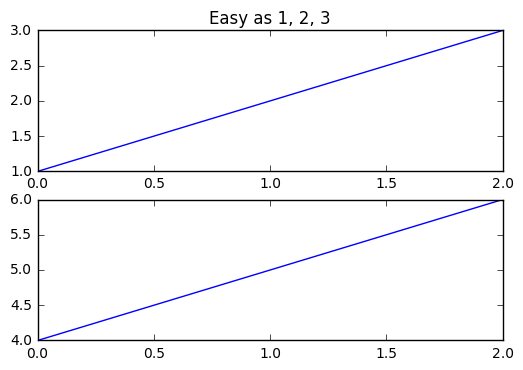

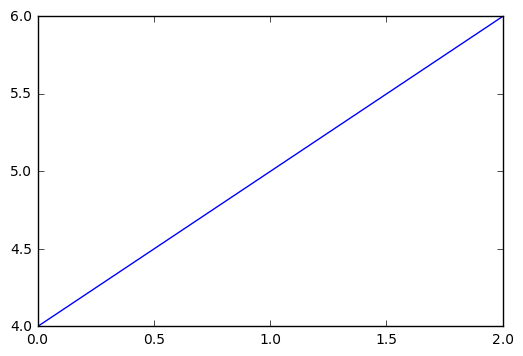

In [7]:
plt.close()

plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

plt.show()

Vous pouvez effacer la figure actuelle avec clf() et les axes courants avec cla(). Si vous trouvez ennuyeux que les états (en particulier l'image, la figure et les axes actuels) sont gérés en arrière plan, ne désespérez pas : il s'agit juste d'un wrapper autour d'une API orientée objet, que vous pouvez utiliser à la place (Voir le didacticiel de Artist)

Si vous faites beaucoup de figures, vous devez être conscient d'une chose de plus : la mémoire requise pour une figure n'est pas complètement libérée jusqu'à ce que la figure soit explicitement fermée avec close(). Supprimer toutes les références à la figure et / ou utiliser le gestionnaire de fenêtres pour tuer la fenêtre dans laquelle la figure apparaît à l'écran, ne suffit pas, parce que pyplot maintient des références internes jusqu'à ce que close() soit appelé.

# Travailler avec du texte

La commande text() peut être utilisée pour ajouter du texte dans un emplacement arbitraire, et xlabel(), ylabel() et title() sont utilisés pour ajouter du texte dans les emplacements indiqués.

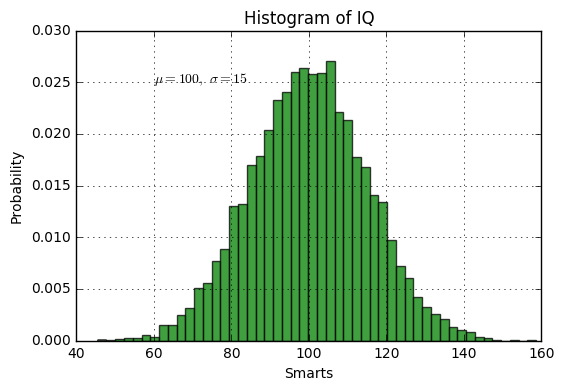

In [8]:
plt.close()

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Toutes les commandes text() renvoient une instance matplotlib.text.Text. Tout comme avec les lignes ci-dessus, vous pouvez personnaliser les propriétés en passant des arguments de mots clés dans les fonctions de texte ou en utilisant setp() :

In [9]:
t = plt.xlabel('my data', fontsize=14, color='red')

## Utiliser des expressions mathématiques dans du texte

Matplotlib accepte les expressions d'équation TeX dans n'importe quelle expression de texte. Par exemple, pour écrire l'expression *expression* dans le titre, vous pouvez écrire une expression TeX entourée de signes de dollar:

In [10]:
plt.title(r'$\sigma_i=15$')

Le r précédant la chaîne de titre est important - il signifie que la chaîne est une chaîne brute et ne pas traiter les backslashes comme un caractère d'échappement. Matplotlib dispose d'un analyseur d'expression TeX intégré et d'un moteur de mise en page, et envoie ses propres polices mathématiques. Ainsi, vous pouvez utiliser du texte mathématique sans avoir besoin d'une installation TeX. Pour ceux qui ont installé LaTeX et dvipng, vous pouvez également utiliser LaTeX pour formater votre texte et incorporer la sortie directement dans vos chiffres d'affichage ou postscript enregistré - voir Rendu texte avec LaTeX.

## Annoter le texte

Les utilisations de la commande text() de base ci-dessus placent le texte à une position arbitraire sur les Axes. Une utilisation courante pour le texte est d'annoter une caractéristique du tracé, et la méthode annotate() fournit une fonctionnalité d'assistance pour faciliter les annotations. Dans une annotation, il y a deux points à considérer: l'emplacement étant annoté représenté par l'argument xy et l'emplacement du texte xytext. Ces deux arguments sont des tuples (x, y).

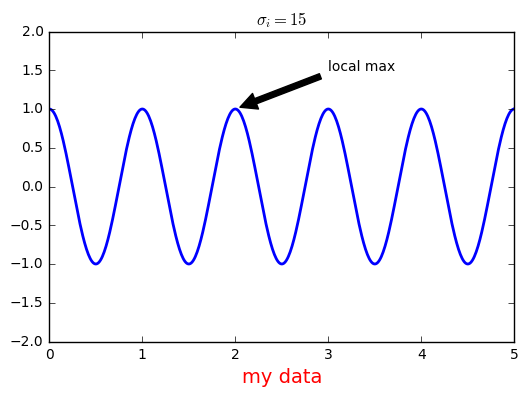

In [11]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

Dans cet exemple de base, les positions xy (pointe de flèche) et xytext (emplacement de texte) sont dans les coordonnées de données. Il existe une variété d'autres systèmes de coordonnées que l'on peut choisir.

# Axes logarithmiques et non linéaires

Matplotlib.pyplot supporte non seulement les échelles linéaires, mais aussi les échelles logarithmiques et logiques. Ceci est communément utilisé si les données couvrent de nombreux ordres de grandeur. Changer l'échelle d'un axe est facile:

plt.xscale ('log')

Un exemple de quatre graphiques avec les mêmes données et différentes échelles pour l'axe y est illustré ci-dessous.

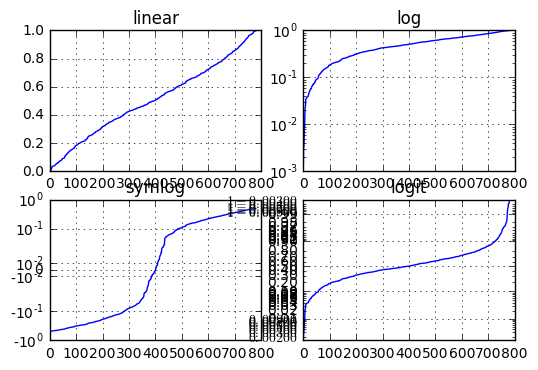

In [12]:
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()

Il est aussi possible de créer notre propore échelle.